# Chemical Reactions

Status: In dev


## Tutorial

This tutorial will show you how to: 

1. Define reactions from SMARTS or Blocks
2. Basic reactions examples
3. Fragment replacement examples
 
## Datamol example

In [1]:
import datamol as dm
from datamol.reactions import rxn_from_block, rxn_from_smarts

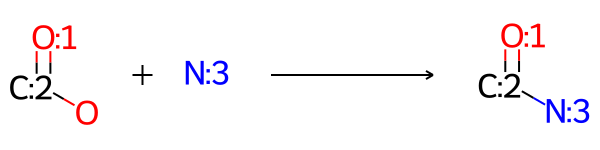

In [2]:
# Define a reaction from rxn block finle
rxn = rxn_from_block("data/ReactionBlock.rxn", sanitize=True)
rxn

In [3]:
dm.reactions.is_reaction_ok(rxn)

2022-10-13 20:27:07.061 | INFO     | datamol.reactions._reactions:is_reaction_ok:66 - Number of warnings:0
2022-10-13 20:27:07.062 | INFO     | datamol.reactions._reactions:is_reaction_ok:67 - Number of preprocessing errors: 0
2022-10-13 20:27:07.063 | INFO     | datamol.reactions._reactions:is_reaction_ok:68 - Number of reactants in reaction: 2
2022-10-13 20:27:07.064 | INFO     | datamol.reactions._reactions:is_reaction_ok:69 - Number of products in reaction: 1
2022-10-13 20:27:07.064 | INFO     | datamol.reactions._reactions:is_reaction_ok:70 - Preprocess labels added:((), ())


True

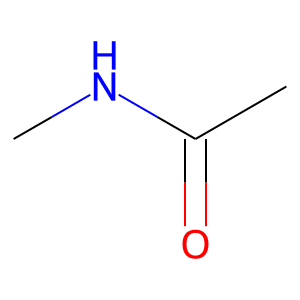

In [4]:
# Apply reaction and snitize the products
prod_mols = dm.reactions.apply_reaction(rxn=rxn, reactants=(dm.to_mol('CC(=O)O'), dm.to_mol('NC')),
                                       as_smiles=False, sanitize=True, single_output=False)
dm.to_image(prod_mols)

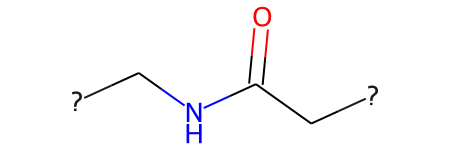

In [5]:
# Return a single product in SMILES and keep the open attachment points
prod_smi_att = dm.reactions.apply_reaction(rxn=rxn, reactants=(dm.to_mol('[2*]CC(=O)O'), dm.to_mol('NC[1*]')),
                                       as_smiles=False, sanitize=True, single_output=True, rm_attach=False)
prod_smi_att

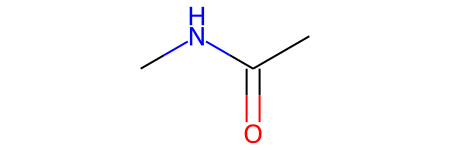

In [6]:
# Return a single product in SMILES without any open attachment points
prod_smi = dm.reactions.apply_reaction(rxn=rxn, reactants=(dm.to_mol('[2*]CC(=O)O'), dm.to_mol('NC[1*]')),
                                       as_smiles=False, sanitize=True, single_output=True, rm_attach=True)
prod_smi

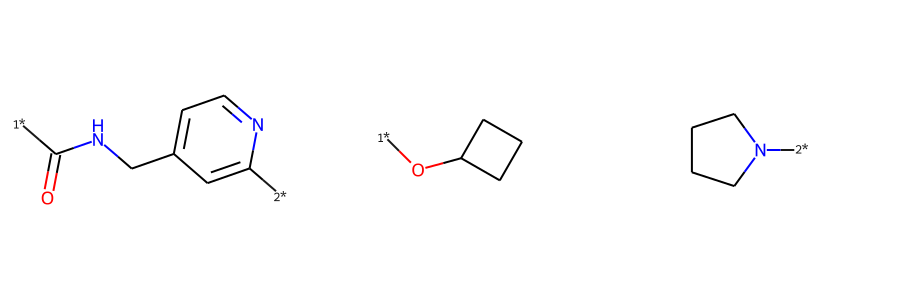

In [7]:

scaffold = dm.to_mol("O=C(NCc1ccnc([2*])c1)[1*]")
frag1 = dm.to_mol("[1*]OC1CCC1")
frag2 = dm.to_mol("[2*]N1CCCC1")
dm.to_image([scaffold, frag1, frag2])

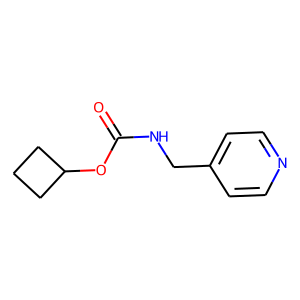

In [8]:
# Define reaction with SMARTS and apply reaction on the specified attachment points

rxn1 = dm.reactions.rxn_from_smarts("[1*][*:1].[1*][*:2]>>[*:1][*:2]")
res1 = dm.reactions.apply_reaction(rxn1, (dm.to_mol(frag1), dm.to_mol(scaffold)), rm_attach=True)
dm.to_image(res1)

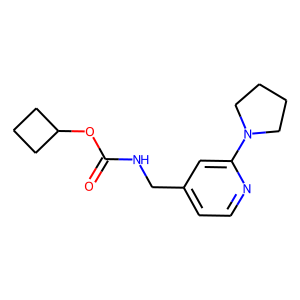

In [9]:
# One reaction to attach multiple specified attchment points 
rxn2 = dm.reactions.rxn_from_smarts("[1*][*:1].[2*][*:4].([1*][*:2].[2*][*:3])>>([*:1][*:2].[*:3][*:4])")
res2 = dm.reactions.apply_reaction(rxn2,(frag1, frag2, scaffold))
dm.to_image(res2)

## References

- [RDKit Cookbook](https://www.rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html)